# **Data Science: BMI prediction using ensemble random forest**
pada project ini membuat sebuah klasifikasi dengan algoritma random forest untuk **untuk klasifikasi status kesehatan berdasarkan tinggi badan, berat badan dan jenis kelamin** pada case kali ini data yang digunakan data BMI yang di dapatkan dari laman website kaggle dan dapat diakses secara open source.

Tahapan yang akan dilakukan pada project meliputi:
<html>
    <body>
        <li>1. Data Preparation</li>
        <li>2. Statistik deskriptif</li>
        <li>3. Analisis dan explorasi data</li>
        <li>4. Build model machine learning</li>
        <li>5. Prediksi dan akurasi score</li>
        <li>6. Build model ke joblib</li>
    </body>
</html>

## **1.Data Preparation**
pada tahap pertama ini dilakukan penyiapan data, import pustaka, load datasheet dan data cleaning 

In [1]:
# import library yang digunakan 
import numpy as np  # library untuk mengolah elemen larik pada python
import pandas as pd # library untuk mengelah dokumen pada python
import joblib 
import warnings 

warnings.filterwarnings('ignore')
from scipy.stats import norm

# import datasheet yang digunakan
#tdataBmi = pd.read_csv("https://raw.githubusercontent.com/myprojectalan/Datasheet/master/bmi.csv")
tdataBmi = pd.read_csv("~/OneDrive/Proyek Ku/machine learning project/DS Bmi classification using ensemble/Datasheet/bmi.csv")

print(tdataBmi)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [2]:
# melihat informasi pada datasheet yang kita miliki
print(tdataBmi.info()) 
print("--------------")
# melihat index dari datasheet 
print(tdataBmi.keys()) 
print("--------------")
# menghitung jumlah data yang mengalami missing value
print(tdataBmi.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
--------------
Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')
--------------
Gender    0
Height    0
Weight    0
Index     0
dtype: int64


<h3>
    <b>Insight:</b>
</h3>
<li>1.Tipe data dari datahshet yang kita miliki terdiri dari int64 dan object</li>
<li>2.dataframe yang kita miliki 4 kolom dan 499 baris data</li>

## **2.Statistik deskriptif**
dibagian 2 ini melakukan analisis statistik dari data tdataBmi tujuan dilakukan nya analisis statistik ini untu mempelajari hubungan yang dimiliki antar fitur dan sebagai acuan atau gambaran sementara untuk dilakukan kegiatan analisis dimasa depan adapaun langkah-langkah pada tahap 2 ini :

<html>
    <body>
        <li>2.1 Data Discreation</li>
        <li>2.2 GroupBy dan Aggregasi</li>
        <li>2.3 Perhitungan pivot table</li>
        <li>2.4 Summary dari dataframe</li>
        <li>2.5 Analisis statistik untuk data kategori</li>
    </body>
</html>

In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size':14})

sns.set(color_codes = True)
sns.set_style("whitegrid")
sns.set_theme(style = "white", palette = None)

plt.style.use('bmh')

### **2.1 Data Discretization (kategorisasi)**
pada bagian ini melakukan discretization untuk mengkategorisasi index data dari dataframe yang kita miliki

In [4]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
    
tdataBmi['Status'] = tdataBmi.apply(convert_status_to_description,axis=1)
tdataBmi.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [5]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
    
tdataBmi['gender_lbl'] = tdataBmi.apply(convert_gender_to_label,axis=1)
tdataBmi.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


<h3>
    <b>Insight:</b>
</h3>
proses binning dilakukan untuk membuat kategorisasi agar lebih mudah untuk dilakukan analisis dan pembuatan model machine learning. pada analisis ini kita membuat kategori pada kolom index dan gender 

### **2.2 melakukan group by dan aggregasi nilai max dan min dari fitur Height, Weight**
setelah proses kategorisasi telah selesai, selanjutnya dilakukan group by pada kolom jenis kelamin dan kategori serta dilanjutkan dengan aggregasi tinggi badan dan berat badan berdasarkan nilai data terkecil dan terbesar nya setelah itu reset index untuk merubah index data 

In [6]:
buatdataBmi = tdataBmi.groupby(['Gender','Status']).agg({'Height':['min','max'],'Weight':['min','max']}).reset_index()
print(buatdataBmi)

    Gender           Status Height      Weight     
                               min  max    min  max
0   Female  Extreme Obesity    140  196     86  160
1   Female   Extremely Weak    163  198     50   57
2   Female           Normal    148  199     50   92
3   Female          Obesity    140  198     66  154
4   Female       Overweight    149  197     60  115
5   Female             Weak    170  195     53   65
6     Male  Extreme Obesity    140  195     79  160
7     Male   Extremely Weak    181  198     50   54
8     Male           Normal    154  199     51   99
9     Male          Obesity    142  199     69  156
10    Male       Overweight    140  198     52  109
11    Male             Weak    168  196     50   69


### **2.3 melakukan perhitungan pivot table**

sama dengan proses pada sub 2.4 kita juga dapat melakukan perhitungan aggregasi dengan menggunakan pivot table yang sudah disiapkan oleh library external dengan pandas dengan menggunakan pivot ini akan lebih memudahkan kita dalam melakukan explorasi data 

In [7]:
tpivotBmi1 = pd.pivot_table(data = tdataBmi, index="Status", columns = 'Gender', values = 'Height')
print(tpivotBmi1)

Gender               Female        Male
Status                                 
Extreme Obesity  161.569892  160.457143
Extremely Weak   186.571429  188.666667
Normal           171.682927  178.035714
Obesity          174.338028  173.322034
Overweight       176.944444  174.906250
Weak             184.142857  185.066667


<AxesSubplot:xlabel='Gender', ylabel='Status'>

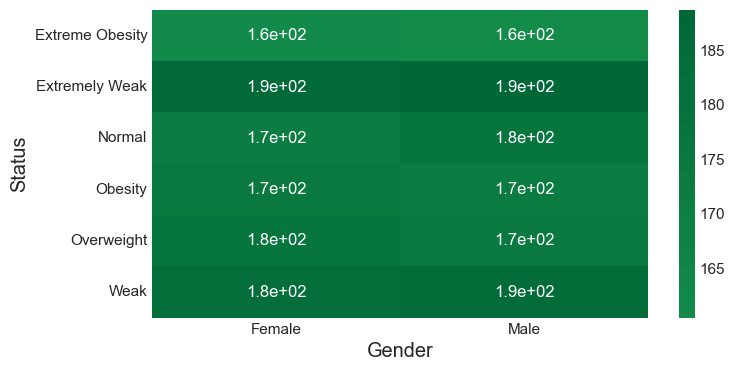

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(tpivotBmi1, annot=True, cmap = 'RdYlGn', center = 0.117)
# plt.savefig('heatmap pivot weight.png', bbox_inches='tight')

In [9]:
tpivotBmi = pd.pivot_table(data = tdataBmi, index="Status", columns = 'Gender', values = 'Weight')
print(tpivotBmi)

Gender               Female        Male
Status                                 
Extreme Obesity  135.526882  130.552381
Extremely Weak    51.857143   51.500000
Normal            66.926829   72.250000
Obesity          108.070423  107.813559
Overweight        87.722222   85.937500
Weak              58.714286   59.733333


<AxesSubplot:xlabel='Gender', ylabel='Status'>

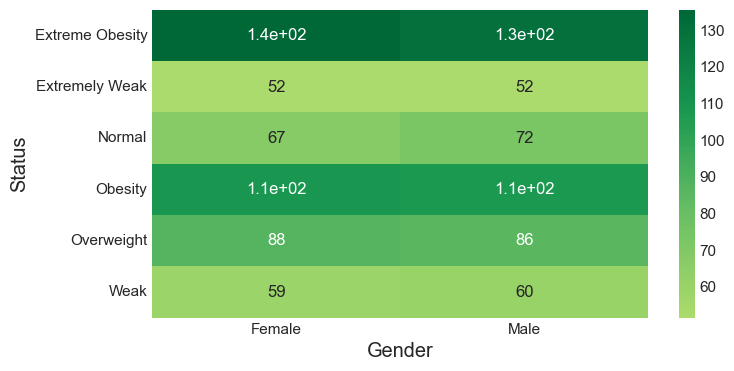

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(tpivotBmi, annot=True, cmap = 'RdYlGn', center = 0.117)
# plt.savefig('heatmap pivot Height.png', bbox_inches='tight', dpi=None)

### **2.4 melakukan summary (ringkasan statistik dengan describe)**
melakukan rinkasan statistik dari dataframe yang kita miliki

In [11]:
tdataBmi.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0
Index,500.0,3.748,1.355053,0.0,3.0,4.0,5.0,5.0
gender_lbl,500.0,0.490,0.500401,0.0,0.0,0.0,1.0,1.0


<h3>
    <b>Insight:</b>
</h3>

1. terlihat ringkasan statistik dari variabel tdataBmi menampilkan jumlah dari setiap fitur, nilai mean, standar deviasi nilai minimal, quantile data dan nilai maksimal dari setiap fitur kolom.

In [12]:
buatdataBmi.describe().T

count        mean        std    min    25%    50%     75%    max
Height min   12.0  152.916667  14.260297  140.0  140.0  148.5  164.25  181.0
       max   12.0  197.333333   1.497473  195.0  196.0  198.0  198.25  199.0
Weight min   12.0   59.666667  12.601106   50.0   50.0   52.5   66.75   86.0
       max   12.0  107.500000  41.668606   54.0   68.0  104.0  154.50  160.0

<h3>
    <b>Insight:</b>
</h3>

1. terlihat ringkasan statistik dari variabel tdataBmi menampilkan jumlah dari setiap fitur, nilai mean, standar deviasi nilai minimal, quantile data dan nilai maksimal dari setiap fitur kolom.

### **2.5 Analisis Statistik untuk data kategori**
pada tahap ini melakukan analisis data kategorik pada kolom gender yang akan digunakan untuk membuat visualisasi donat chart  

In [13]:
people = tdataBmi['Gender'].value_counts() 

print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <li> dari hasil analisis tersebut didapat bahwa jumlah data gender untuk laki-laki dan perempuan bernilai sama yaitu berjumlah 255 dari 500 data</li>

In [14]:
categories = tdataBmi['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <li> 1. jumlah orang dengan klasifikasi berat badan extreme obesity bejumlah 198 orang</li>
    <li> 2. jumlah orang dengan klasifikasi berat badan obesitas berjumlah 130 orang</li>
    <li> 3. jumlah orang dengan klasifikasi berat badan normal berjumlah 69 orang</li>
    <li> 4. jumlah orang dengan klasifikasi berat badan overweight berjumlah 68 orang</li>
    <li> 5. jumlah orang dengan klasifikasi berat badan weak berjumlah 22 orang</li>
    <li> 6. jumlah orang dengan klasifikasi berat nadan extremely weak berjumlah 13 orang </li>
    <hr>
    <p> dari hasil analisis tersebut jumlah orang yang mengidap berat badan extreme sangat lah banyak sehingga kedepannya diharapkan dilakukan penyuluhan akan pola hidup yang sehat</p>  

<h2> Comparion Male vs Female</h2>
ditahap ini kita akan melakukan perbandingan klasifikasi berat badan antara laki-laki dan perempuan

<h3><b>Male Categories</b></h3>
ditahap ini kita akan membuat variabel baru untuk membuat visualisasi data dengan donat chart

In [15]:
data_visual_male = tdataBmi[tdataBmi['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [16]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <li>1.jumlah laki-laki yang mengidap berat badan extreme berjumlah 105 orang</li>
    <li>2.jumlah laki-laki yang mengidap berat badan obsitas berjumlah 59 orang</li>
    <li>3.jumlah laki-laki yang mengidap berat badan overweight berjumlah 32 orang</li>
    <li>4.jumlah laki-laki yang mengidap berat badan normal berjumlah 28 orang</li>
    <li>5.jumlah laki-laki yang mengidap berat badan kurus berjumlah 15 orang</li>
    <li>6.jumlah laki-laki yang mengidap berat badan gizi buruk berjumlah 6 orang</li>
    <hr>
    <p> dari analisis ini dapat diketahui bahwa laki-laki lebih sulit menjaga berat badan dibanding dengan perempuan</p>
    <hr>
</html>

<h3><b>Female Categories</b></h3>
ditahap ini kita akan membuat variabel baru untuk membuat visualisasi data dengan donat chart

In [17]:
data_visual_female = tdataBmi[tdataBmi['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [18]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: Status, dtype: int64

<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <li>1.jumlah perempuan yang mengidap berat badan extreme berjumlah 93 orang</li>
    <li>2.jumlah perempuan yang mengidap berat badan obsitas berjumlah 71 orang</li>
    <li>3.jumlah perempuan yang mengidap berat badan overweight berjumlah 36 orang</li>
    <li>4.jumlah perempuan yang mengidap berat badan normal berjumlah 41 orang</li>
    <li>5.jumlah perempuan yang mengidap berat badan kurus berjumlah 7 orang</li>
    <li>6.jumlah perempuan yang mengidap berat badan gizi buruk berjumlah 7 orang</li>
    <hr>
    <p> dari analisis ini dapat diketahui bahwa perempuan lebih bisa menjaga berat badan dibanding dengan laki-laki</p>
    <hr>
</html>

## **3. Eksplorasi data dan analisis statistik**
dibagian 3 ini melakukan visualisasi data tujuan untuk mempelajari hubungan yang dimiliki antar fitur dan sebagai acuan atau gambaran sementara untuk dilakukan kegiatan analisis dimasa depan adapaun langkah-langkah pada tahap 3 ini :

<html>
    <body>
        <li>3.1 Import library yang digunakan</li>
        <li>3.2 Analisis univariat dan bivariat</li>
        <li>3.3 Analisis nilai outlier</li>
        <li>3.4 Analisis distribusi data dengan histogram</li>
        <li>3.5 Grafik donat dan pie chart untuk analisis data kategorik</li>
        <li>3.6 Analisis multivariat</li>
        <li>3.7 korelasi tinggi badan berat badan</li>
    </body>
</html>

### **3.1 import library yang digunakan**
pada bagian ketiga ini melakukan eksplorasi data dan analisis statistik dengan Displot, deteksi nilai outlier, 
analisis univariat, analisis bivariat dan analisis multivariat dengan menggunakan grafik jointplot yang sudah tersedia dari library seaborn

In [19]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size':14})

sns.set(color_codes = True)
sns.set_style("whitegrid")
sns.set_theme(style = "white", palette = None)

plt.style.use('bmh')

### **3.2 Analisis Univariat dan bivariat**
pada tahap ini melakukan analisis 2 variabel dengan analisis univariat untuk kolom kategori dan gender dengan menggunakan visualisasi countplot

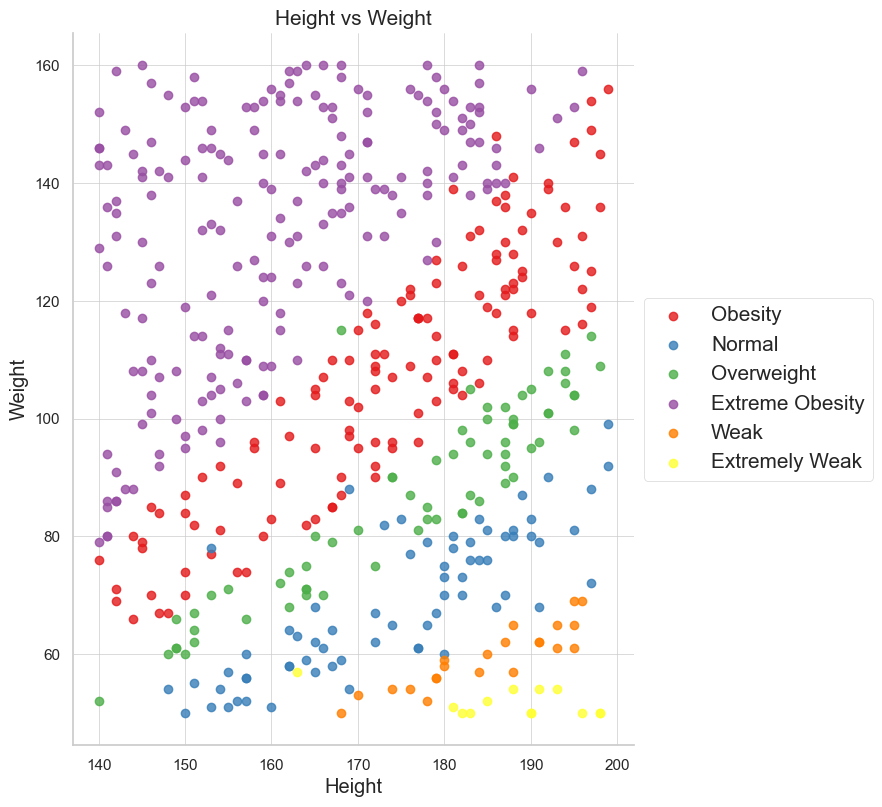

In [20]:
sns.set_style('whitegrid')
sns.lmplot( x='Height', y='Weight', data=tdataBmi, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
# plt.savefig('Grafik lm plot Height vs Weight.png', bbox_inches='tight', dpi = None)

### **3-D Scatter plot to differentiate b/w male and female**

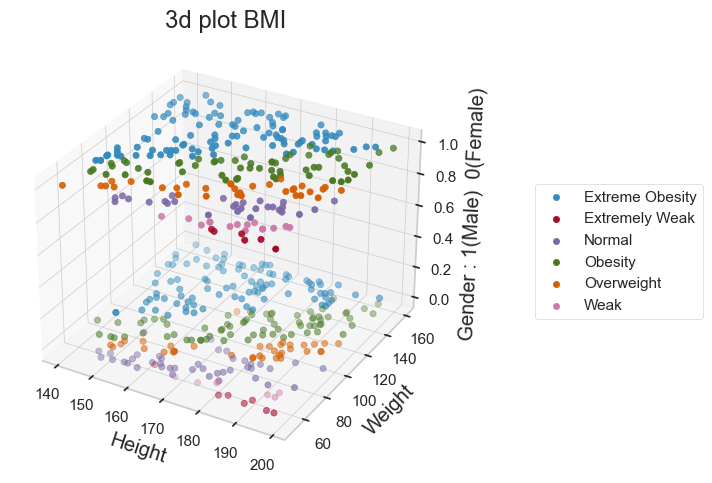

In [21]:
groups = tdataBmi.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), prop={'size': 11})
plt.show()

selanjutnya membuat grafik countplot untuk mengetahui jumlah klasifikasi dari setiap gender 

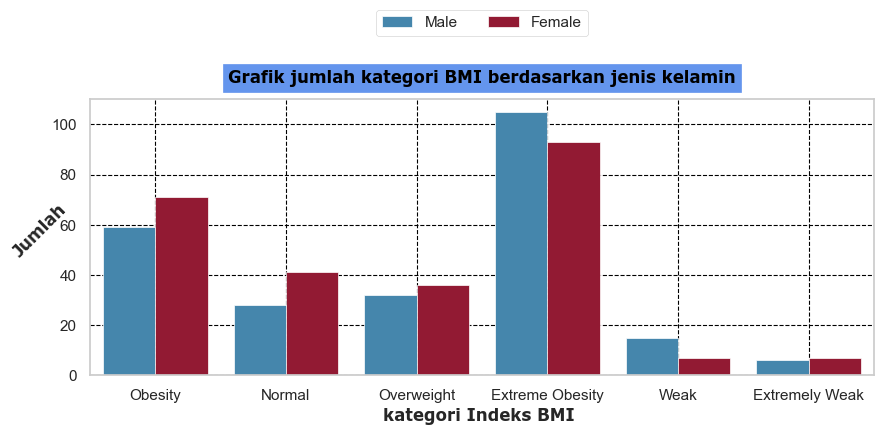

In [22]:
fig, ax = plt.subplots(figsize = (9,4))
sns.countplot(x = 'Status', data = tdataBmi, hue = 'Gender', ax=ax)

ax.grid(axis="x")
plt.title("Grafik jumlah kategori BMI berdasarkan jenis kelamin", 
    fontsize = 12, 
    fontweight = 'bold',
    fontfamily = 'verdana',
    pad = 2.0,
    backgroundcolor='#6495ED',
    color='black', 
    loc="center",  
    y=1.05)

# Add a x and y label
# add a x and y label
ax.set_xlabel("kategori Indeks BMI ", fontsize = 12, fontweight = 'bold', fontfamily = 'verdana')
ax.set_ylabel("Jumlah", 
              fontsize = 12, 
              fontweight = 'bold', 
              fontfamily = 'verdana', 
              rotation = 45)

# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend( loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3,)

plt.grid(color = 'black', linestyle = '--', linewidth = 0.8)

plt.tight_layout()
plt.show()
# plt.savefig('Grafik countplot BMI.png', bbox_inches='tight', dpi = None)

<h3>dari analisis graik tersebut didapat kesimpulan sebagai berikut:</h3>
<html>
    <body>
        <li>1. jumlah klasifikasi kurus lebih banyak dialami oleh pria dengan jumlah 40 orang sedangkan wanita berjumlah 25 orang</li>
        <li>2. jumlah klasifikasi normal lebih banyak dialami oleh wanita dengan jumlah 42 orang sedangkan pria berjumlah 38 orang</li>
        <li>3. jumlah klasifikasi sedang lebih banyak dialami oleh wanita dengan jumlah 52 orang sedangkan pria berjumlah 45 orang</li>
        <li>4. jumlah klasifikasi obesitas level 1 banyak dialami oleh pria dengan jumlah 45 orang sedangkan wanita berjumlah 40 orang</li>
        <li>5. jumlah klasifikasi obesitas level 2 banyak dialami oleh wanita dengan jumlah 59 orang sedangkan pria berjumlah 49 orang</li>
        <li>6. jumlah klasifikasi obesitas level 3 banyak dialami oleh pria dengan jumlah 35 orang sedangkan wanita berjumlah 29 orang</li>
    </body>
    <h3>
        <b>Insight:</b>
    </h3>
    <h5>perempuan lebih sulit menjaga berat badan dibanding dengan wanita sehingga perlu dilakukan perubahan pola makan yang sehat</h5>
</html>

### **3.3 Deteksi nilai outlier**
sebelum membuat model machine learning kita perlu melakukan explorasi data untuk mengetahui apakah data kita sudah siap untuk digunakan atau data perlu diproses lebih lanjut seperti deteksi nilai outlier, teknik seleksi fitur atau pun data preprocessing

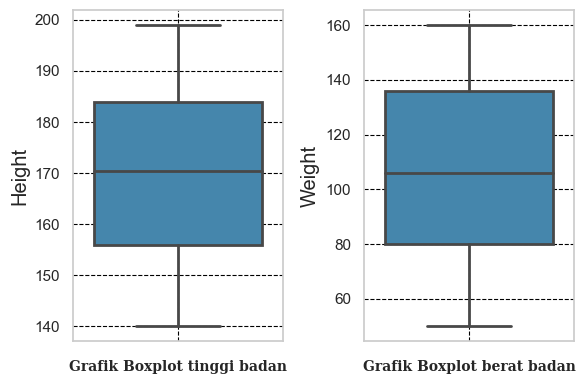

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(6,4))

# buat grafik boxplot
sns.boxplot(y = 'Height', data = tdataBmi, ax=axs[0])
sns.boxplot(y = 'Weight', data = tdataBmi, ax=axs[1])


axs[0].set_xlabel("Grafik Boxplot tinggi badan", 
              fontsize = 10, 
              fontweight = 'bold', 
              fontfamily = 'serif')

axs[1].set_xlabel("Grafik Boxplot berat badan", 
                fontsize = 10, 
                fontweight = 'bold', 
                fontfamily = 'serif')

axs[0].grid(color = 'black', linestyle = '--', linewidth = 0.8)
axs[1].grid(color = 'black', linestyle = '--', linewidth = 0.8)

plt.tight_layout()
plt.show()
# plt.savefig('Grafik boxplot BMI.png', bbox_inches='tight', dpi = None)

<h3>
    <b>Insight:</b>
</h3>
<p>pada visualisasi boxplot ini tidak ditemukan nilai outlier pada data tinggi badan dan berat badan sehingga kita bisa melakukan proses ke tahap selanjutnya.</p>

### **3.4 Analis Central density function & Probabilty density function**
ditahap ini kita akan melakukan analisis distribusi frekunesi untuk mengetahui apakah jumlah distribusi data yang kita miliki positif atau 

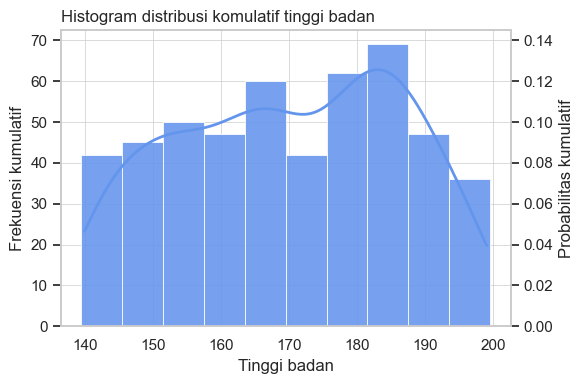

In [24]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(6, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(tdataBmi['Height'], binwidth=6, 
             binrange=(tdataBmi['Height'].min()-0.5, 
                       tdataBmi['Height'].max()+0.5), 
             ec="w", color="#6495ED", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(tdataBmi['Height'], 
             stat="probability", binwidth=6, 
             binrange=(tdataBmi['Height'].min()-0.5, 
                       tdataBmi['Height'].max()+0.5), 
             kde=True, ec="w", color="#6495ED", ax=ax1)
# set label
ax.set_xlabel("Tinggi badan", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif tinggi badan", fontsize=12, loc="left")
plt.tight_layout()
plt.show()
# plt.savefig('Histogram BMI tinggi badan.png', bbox_inches='tight', dpi = None)

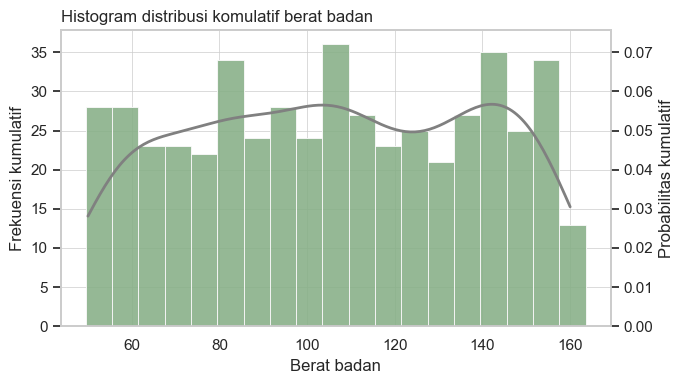

In [25]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(7, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(tdataBmi['Weight'], binwidth=6, 
             binrange=(tdataBmi['Weight'].min()-0.5, 
                       tdataBmi['Weight'].max()+0.5), 
             ec="w", color="lightgreen", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(tdataBmi['Weight'], 
             stat="probability", binwidth=6, 
             binrange=(tdataBmi['Weight'].min()-0.5, 
                       tdataBmi['Weight'].max()+0.5), 
             kde=True, ec="w", color="grey", ax=ax1)
# set label
ax.set_xlabel("Berat badan", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif berat badan", fontsize=12, loc="left")
plt.tight_layout()
plt.show()
# plt.savefig('Histogram berat badan BMI.png', bbox_inches='tight', dpi = None)

### **3.5 Persentase klasifikasi kategori berat badan dengan pie chart**
selanjutnya kita akan melakukan analisis persentase berat badan dengan pie chart

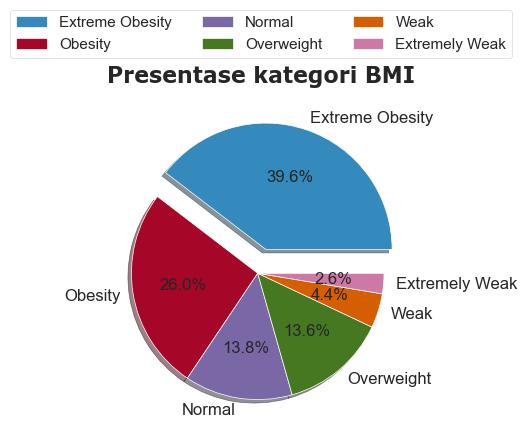

In [26]:
kat_bmi   = tdataBmi['Status'].value_counts()
kat_size  = kat_bmi.tolist()
kat_types = kat_bmi.axes[0].tolist()
 
myexplode = [0.2, 0, 0, 0, 0, 0]

plt.figure(figsize=(6, 4))

plt.title('Presentase kategori BMI', 
          fontsize = 16, 
          fontweight = 'bold', 
          fontfamily = 'verdana',  
          y = 1.05)

patches, texts, autotexts = plt.pie(kat_size, 
                                    labels = kat_types, 
                                    autopct='%1.1f%%', 
                                    shadow = True, 
                                    startangle=360, 
                                    explode=myexplode)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    autotext.set_fontsize(12)
    

plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 1.34), 
           ncol=3)

plt.axis('equal')
plt.show()
# plt.savefig('Grafik pie chart BMI.png', bbox_inches='tight', dpi = None)

<html>
    <h3><b>Insight:</b></h3>
    <li> dari hasil persentase tersebut rata-rata klasifikasi berat badan paling tinggi adalah Extreme obesity yaitu mencapai 39.6% sehingga pada kasus tersebut dapat dilakukan edukasi tentang pola hidup yang sehat</li> 
</html>

#### **Comparison** 
pada bagian ini melakukan analisis dengan membuat grafik donat untuk pesentase antara jenis kelamin dengan status 

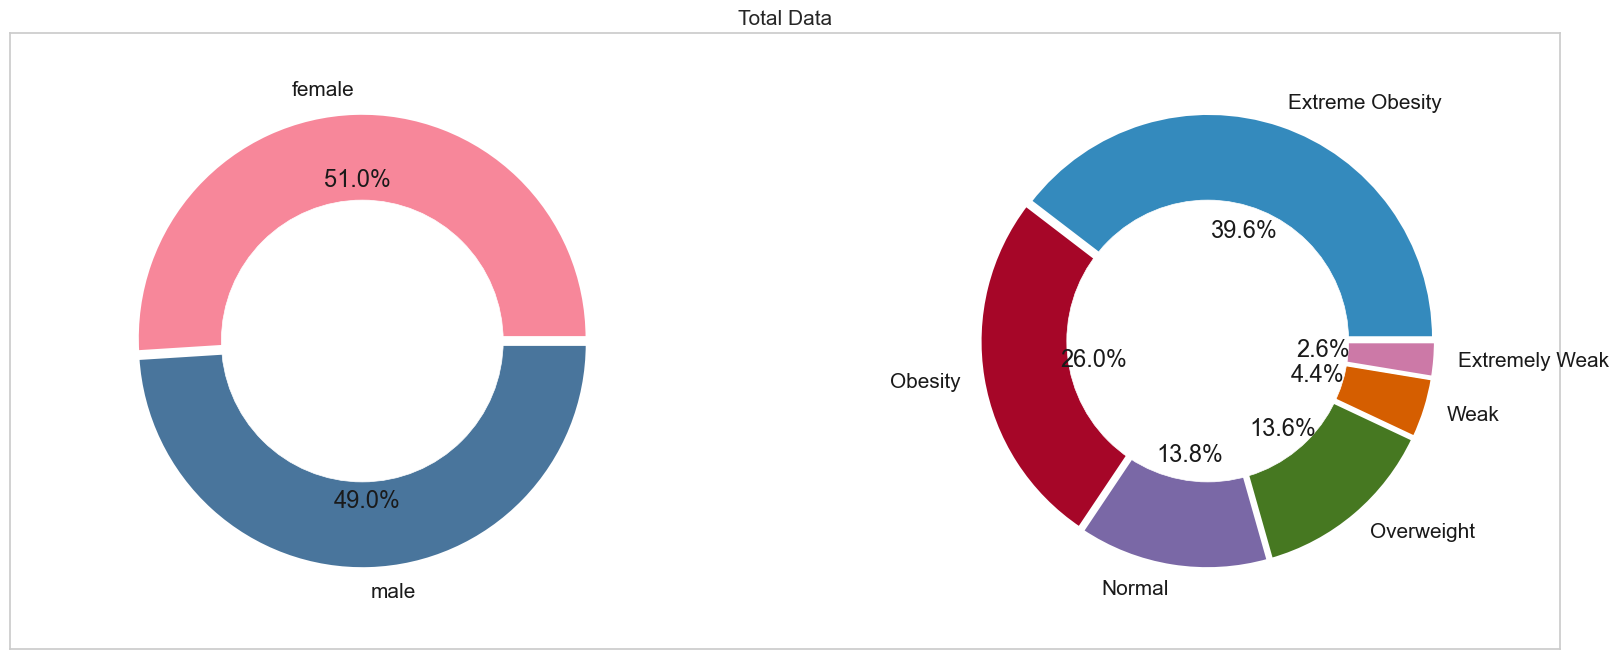

In [27]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
# plt.savefig('Grafik donat chart bmi.png', bbox_inches='tight', dpi = None)

<html>
    <h3>
        <b>Insight:</b>
    </h3>
     <li>1. dari visualisasi data tersebut dapat diketahui bahwa persentase jenis kelamin perempuan mencapai 51.0%</li>
     <li>2. dan dari visualisasi tersebut juga dapat diketahui bahwa extreme obesity merupakan masalah paling serius</li>
</html>

selanjutnya kita akan melakukan perbandingan klasifikasi bmi dengan pie chart 

Text(0, 0, 'Male')

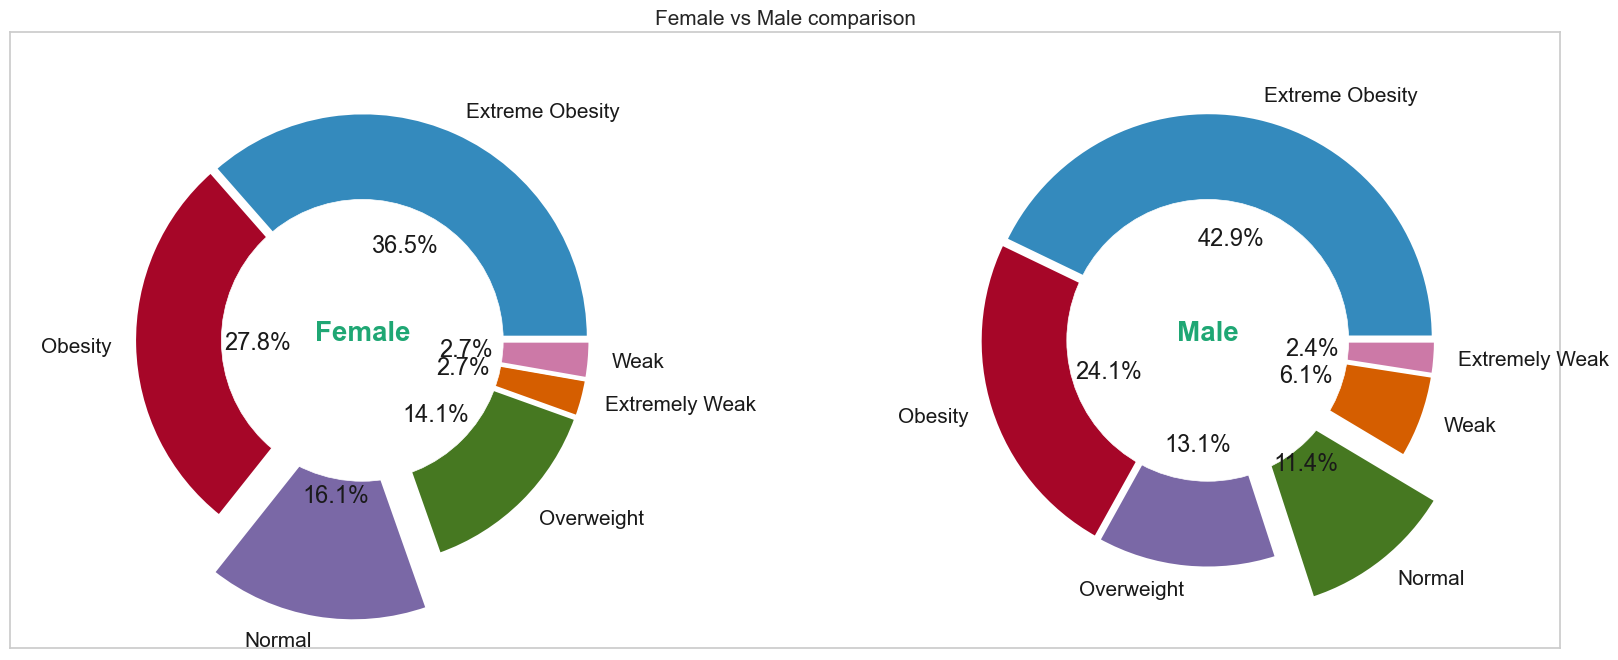

In [28]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')
# plt.savefig('Grafik pie chart Female vs male comparison.png', bbox_inches='tight', dpi = None)

<h3>
    <b>Insight:</b>
</h3>
<li> 1. persentase bmi laki -laki lebih banyak dibandingkan dengan perempuan </li>
<li> 2. persentase bmi perempuan lebih sedikit dibandingkan dengan laki-laki</li>

### **3.6 Pengujian analisis multivariat dengan Anova**
pada tahap ini dilakukan analisis multivariat dengan menguji data berat badan, tinggi badan dan kategori untuk diketahui pengaruh nya apabila nilai p value lebih kecil dari 0.005 maka H0 diterima dan HA ditolak dan begitu juga sebalik nya 

In [29]:
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X = tdataBmi['Height'].values[:, np.newaxis] 
Y = tdataBmi['Weight'].values[:, np.newaxis]
Z = tdataBmi['Gender'].values

model = ols("X ~ Z + Y", tdataBmi).fit()

print(model.summary())

print("Nyatakan parameter estimasi")
print(model._results.params)

anova_results = anova_lm(model)

print('Hasil anova')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.07777
Date:                Tue, 24 Jan 2023   Prob (F-statistic):              0.925
Time:                        20:19:44   Log-Likelihood:                -2106.8
No. Observations:                 500   AIC:                             4220.
Df Residuals:                     497   BIC:                             4232.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.1946      2.608     65.255      0.0

#### **Analisis Multivariat dengan Multiple Linear Regression**
pada tahap ini dilakukan analisis multivariat dengan menguji data berat badan, tinggi badan dan kategori untuk diketahui pengaruh nya apabila nilai p value lebih kecil dari 0.005 maka H0 diterima dan HA ditolak dan begitu juga sebalik nya 

In [30]:
tdataBmi.drop(["Status","gender_lbl"], inplace = True, axis = 1)

In [31]:
# library untuk preprocessing data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# library untuk membuat data train dan test 
from sklearn.model_selection import train_test_split
# library model machine learning 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# library untuk pengukuran akurasi
from sklearn import metrics

# buat variabel untuk preprocessing data 
lbl_enc1 = LabelEncoder()
Min_scr1 = MinMaxScaler()

# preprocessing data kolom gender, height dan weight 
tdataBmi.iloc[:, :1] = lbl_enc1.fit_transform(tdataBmi.iloc[:, :1])
tdataBmi.iloc[:, :3] = Min_scr1.fit_transform(tdataBmi.iloc[:, :3])
tdataBmi.head()

,Gender,Height,Weight,Index
0,1.0,0.576271,0.418182,4
1,1.0,0.830508,0.336364,2
2,0.0,0.762712,0.545455,4
3,0.0,0.932203,0.490909,3
4,1.0,0.152542,0.100000,3


preprocessing data digunakan untuk normalisasi nilai data pada merubah kolom gender dengan label encoder dan normalisasi data kolom tinggi badan dan berat badan menggunakan teknik minmaxscaler 

membuat variabel x dan y dari data yang sudah dinormalisasi kemudian bagi data menjadi data train dan test 

In [32]:
x1 = tdataBmi.iloc[:, :-1] # mengambil 3 kolom untuk variabel x yaitu (gender, height dan weight)
y1 = tdataBmi.iloc[:, 1]   # mengambil 1 kolom untuk variabel y yaitu (Index)

# membagi data menjadi train dan test dengan proporsi dana 33 % dari keselurahan data dan dipilih acak sebanyak 123 x
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state = 123)

# membuat variabel untuk memanggil algoritma linear regresi dan melakukan pelatihan untuk variabel x dan y
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

# prediksi dengan data y test
y_pred = regressor.predict(x1_test)

# buat kolom baru untuk membandingkan data test dengan data prediksi
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
229,0.661017,0.661017
337,0.406780,0.406780
327,0.457627,0.457627
416,0.203390,0.203390
306,0.728814,0.728814


In [33]:
print("Model R^2 Squared value : ", metrics.r2_score(y1_test, y_pred))

Model R^2 Squared value :  1.0


<h3>
    <b>Insight:</b>
</h3>
<p> dari hasil prediksi dengan regresi tersebut dapat diketahui bahwa model dapat memprediksi sangat akurat tentu saja ada 2 kemungkinan yaitu apakah model mengamai overfitting atau tidak, tapi untuk kasus ini kita hanya akan melihat pengaruh berat badan dan tinggi badan untuk menguji hipotesis yang kita miliki</p>

membuat model API untuk analisa multiple linear regression 

In [34]:
X_new = sm.add_constant(x1)
X_opt = tdataBmi.iloc[:, [0, 1, 2]]
regressor_OLS = sm.OLS(endog = y1, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.428e+33
Date:                Tue, 24 Jan 2023   Prob (F-statistic):                        0.00
Time:                        20:19:46   Log-Likelihood:                          17505.
No. Observations:                 500   AIC:                                 -3.500e+04
Df Residuals:                     497   BIC:                                 -3.499e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender      2.741e-16   1.27e-17     21.537      0.000    2.49e-16    2.99e-16
Height         1.0000   1.88e-17   5.32e+16      0.000       1.000       1.000
Weight      -2.81e-16   1.85e-17    -15.186      0.000   -3.17e-16   -2.45e-16
==============================================================================
Omnibus:                       96.214   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.614
Skew:                          -0.036   Prob(JB):                     3.34e-05
Kurtosis:                       2.008   Cond. No.                         3.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>
    <b>Insight</b>
</h3>
<p> dari hasil analisis tersebut dapat diketahui bahwa variabel gender, height dan weight memiliki pvalue lebih kecil dari <b>0.005</b> H0 diterima dan HA ditolak artinya gender, berat badan dan tinggi badan berpengaruh pada BMI</p>

## **4. Model Machine Learning**

### **4.1 klasifikasi BMI dengan model ensemble (decision tree C.50, Naive bayes, Random Forest)**
membuat model klasifikasi dengan teknik ensemble menggunakan 3 algoritma decision tree C.50, Naive bayes dan Random Forest

In [35]:
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

dataBmi = pd.read_csv("~/OneDrive/Proyek Ku/machine learning project/DS Bmi classification using ensemble/Datasheet/bmi.csv")

env = LabelEncoder()
dataBmi['Gender'] = env.fit_transform(dataBmi['Gender'])

X = dataBmi.iloc[:, :-1].values
Y = dataBmi.iloc[:, -1].values

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 123)

clf1 = GaussianNB()
clf2 = RandomForestClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('nb', clf1), ('rf', clf2)], voting='hard')

# Fit the ensemble model to the training data
ensemble.fit(X_train, Y_train)

y_pred = ensemble.predict(X_test)

# Test the ensemble model on the test data
accuracy = ensemble.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.09%


<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <p>dari penggabungan 3 algoritma dengan teknik esemble tersebut di dapat akurasi sebesar 90 % dapat dikatan akurasi tersebut besar dan baik untuk model kita. apabila akurasi nya 100 % berarti model kita mengalami overfitting dan sangat tidak bagus sehingga perlu diperbaiki</p>
</html>

#### **4.1.1 proporsi jumlah data train dan test yang digunakan**
apabila kita ingin mengetahui jumlah proporsi dari data train dan juga test yang digunakan kita dapat menggunakan library numpy 

In [36]:
print("jumlah data x_train yang digunakan adalah : ", X_train.shape)
print("jumlah data x_test  yang digunakan adalah : ", X_test.shape)
print("jumlah data y_train yang digunakan adalah : ", Y_train.shape)
print("jumlah data y_test  yang digunakan adalah : ", Y_test.shape)

jumlah data x_train yang digunakan adalah :  (390, 3)
jumlah data x_test  yang digunakan adalah :  (110, 3)
jumlah data y_train yang digunakan adalah :  (390,)
jumlah data y_test  yang digunakan adalah :  (110,)


<html>
    <h3>
        <b>Insight</b>
    </h3>
    <li>1. jumlah data latih untuk variabel x sebanyak 390 data dari 500 data dan 3 kolom yaitu berat badan, tinggi badan dan gender</li>
    <li>2. jumlah data test untuk variabel x sebanyak 110 data dari 500 data dan 3 kolom</li>
    <li>3. jumlah data latih untuk variabel y sebanyak 390 data </li>
    <li>4. jumlah data test untuk variabel y sebanyak 110 data </li>

#### **4.1.2 Pengukuran Confusion Matrix pada model ensemble**
kita juga perlu melakukan pengukuran untuk mengetahui kinerja dari algoritma kita dengan menggunakan library classification report dari sklearn

In [37]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      0.75      0.75         4
           2       0.61      0.88      0.72        16
           3       0.64      0.50      0.56        14
           4       0.76      0.70      0.73        27
           5       0.93      0.90      0.91        48

    accuracy                           0.79       110
   macro avg       0.78      0.79      0.78       110
weighted avg       0.80      0.79      0.79       110



#### **4.1.3 Validasi model ensemble**
validasi model digunakan untuk membandingkan akurasi model machine learning yang sebelumnya kita buat dengan validasi GridSearchCV untuk diketahui nilai akurasi dan parameter turning terbaik untuk model yang kita buat sehingga dapat mengeveluasi model kita

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = dataBmi.iloc[:, :-1]
y = dataBmi.iloc[:, -1]

# Define the models to use in the grid search
models = {'NB': GaussianNB(),
          'RF': RandomForestClassifier()}

# Define the parameters to search for each model
param_grids = {'NB': {},
               'RF': {'n_estimators': [10, 50, 100]}}

# Perform the grid search with cross-validation
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring = 'accuracy')
    grid_search.fit(X, Y)
    print(f'{model_name} best parameters: {grid_search.best_params_}')
    
    # make predictions
    Y_pred = grid_search.predict(X)
    
    # calculate accuracy
    accuracy = accuracy_score(Y, Y_pred)
    print("Accuracy: ", accuracy)


NB best parameters: {}
Accuracy:  0.732
RF best parameters: {'n_estimators': 100}
Accuracy:  1.0


<html>
    <h3>
        <b>Insight:</b>
    </h3>
    <li> 1.turning parameter pada algoritma naive bayes memiliki akurasi sebesar 72 %
    <li> 2.turning parameter pada algoritma random forest memiliki akurasi sebesar 100 % dengan parameter turning n_estimators sebesar 50</li>
    <hr>
    <b> sehingga pada model ensemble memilih algoritma decision tree dengan akurasi 95 % sebagai keluaran output karena apabila menggunakan algoritma naive bayes maupun random forest memiliki akurasi yang rendah dan rawan akan underfitting dan overfitting</b>
    <hr/>
</html>

### **4.2 Preprocessing Label Encoder**

In [39]:
from sklearn.preprocessing import LabelEncoder

dataBmi = pd.read_csv("~/OneDrive/Proyek Ku/machine learning project/DS Bmi classification using ensemble/Datasheet/bmi.csv")

lbl_enc = LabelEncoder()
dataBmi['Gender'] = lbl_enc.fit_transform(dataBmi['Gender'])

data = pd.DataFrame(dataBmi)
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


<h3>
    <b>Insight:</b>
</h3>
<p> pada proses ini dilakukan preprocessing data untuk merubah tipe data object pada kolom gender menjadi tipe data numerik agar bisa di fit saat melakukan proses training</p> 

### **4.3 Ensemble Modeling (Random Forest Classifier)**
<h3>Training</h3>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from joblib import dump

start_time = datetime.now()

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=123)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)
# dump(rfc, filename="model_bmi.joblib")

end_time    = datetime.now()
result_time = end_time - start_time

print("Duration:",result_time)

Duration: 0:00:00.444475


#### **4.3.1 pembagian proporsi data untuk train dan test** 

In [41]:
print("jumlah data x_train yang digunakan adalah : ", x_train.shape)
print("jumlah data x_test  yang digunakan adalah : ", x_test.shape)
print("jumlah data y_train yang digunakan adalah : ", y_train.shape)
print("jumlah data y_test  yang digunakan adalah : ", y_test.shape)

jumlah data x_train yang digunakan adalah :  (400, 3)
jumlah data x_test  yang digunakan adalah :  (100, 3)
jumlah data y_train yang digunakan adalah :  (400,)
jumlah data y_test  yang digunakan adalah :  (100,)


<html>
    <h3>
        <b>Insight</b>
    </h3>
    <li>1. jumlah data latih untuk variabel x sebanyak 400 data dari 500 data dan 3 kolom yaitu berat badan, tinggi badan dan gender</li>
    <li>2. jumlah data test untuk variabel x sebanyak 100 data dari 500 data dan 3 kolom</li>
    <li>3. jumlah data latih untuk variabel y sebanyak 400 data </li>
    <li>4. jumlah data test untuk variabel y sebanyak 100 data </li>
</html>

### **4.4 Validasi model Random Forest Classifier dengan GridSearchCV**
pada bagian ini melakukan validasi model dengan menggunakan teknik grid search cv untuk mengetahui parameter turning yang sesuai dengan model kita agar model dapat berkerja secara maksimal

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

start_time = datetime.now()

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# define model
rfc = RandomForestClassifier()

# define parameter grid
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# create grid search object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring="accuracy")

# fit grid search to the data
grid_search.fit(x, y)

# print best parameters
print("Best parameters: ", grid_search.best_params_)

# make predictions
y_pred = grid_search.predict(x)

# calculate accuracy
accuracy = accuracy_score(y, y_pred)
end_time    = datetime.now()
result_time = end_time - start_time

print("Duration:",result_time)
print("Accuracy: ", accuracy)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Duration: 0:00:50.561708
Accuracy:  0.986


<html>
    <h3>
        <b>Insight</b>
    </h3>
    <li>1. kita tidak menggunakan parameter max_depth </li>
    <li>2. parameter min_sample_leaf yang cocok untuk model kita adalah 1</li>
    <li>3. parameter min_sample_split yang cocok untuk model kita adalah 5</li>
    <li>4. dan n_estimilator yang cocok untuk model kita adalah 50</li>
    <hr>
    <p><b>dari hasil validasi tersebut mendapat akurasi sebesar 98 % dengan pengaturan turning parameter yang sudah disesuaikan</b></p> 
</html>

### **4.5 Pengukuran Metrics dan Akurasi Model**
melakukan pengukuran metrics dan akurasi model

In [43]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  1, 11,  2,  0,  0],
       [ 0,  0,  2, 11,  1,  0],
       [ 0,  0,  0,  0, 19,  4],
       [ 0,  0,  0,  0,  2, 42]], dtype=int64)

In [44]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc_acc = accuracy_score(y_test, y_pred_rfc)

#Compute performance manually
NewprediksiBenar = (y_pred_rfc == y_test).sum()
NewprediksiSalah = (y_pred_rfc != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test, y_pred_rfc)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

precision    = TP/(TP+FP)
recall       = TP/(TP+FN)

print ("TRUE NEGATIVE (TN)  :", TN)
print ("FALSE NEGATIVE (FN) :", FN)
print ("TRUE POSITIVE (TP)  :", TP)
print ("FALSE POSITIVE (FP) :", FP)

print ("PRECISION :", precision*100,"%")
print ("RECALL    :", recall*100,"%")
print(classification_report(y_test, y_pred_rfc))

prediksi benar:  88  data
prediksi salah:  12  data
Akurasi Algoritme:  88.0 %
TRUE NEGATIVE (TN)  : 1
FALSE NEGATIVE (FN) : 0
TRUE POSITIVE (TP)  : 4
FALSE POSITIVE (FP) : 0
PRECISION : 100.0 %
RECALL    : 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       0.85      0.79      0.81        14
           3       0.85      0.79      0.81        14
           4       0.86      0.83      0.84        23
           5       0.91      0.95      0.93        44

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.88      0.88      0.88       100



<html>
    <h3>
        <b>Insight</b>
    </h3>
    <p>dari hasil pengukuran metrics tersebut dapat diambil kesimpulan bahwa model kita dapat bekerja dengan baik</p> 
</html>

### **4.6 Model Turining parameter**
pada bagian ini merupakan pengaturan kernel pada model random forest untuk menentukan jumlah pohon yang optimal 

#### **4.6.1 Calculation of optimal number of trees in Random Forest**

In [45]:
def trees_in_forest_vs_acc(trees, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [46]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.88, 0.88, 0.88, 0.87, 0.87, 0.88]

**Visualisation of No. of Trees and their corresponding Accracy scores**

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.88
1,200,0.88
2,300,0.88
3,500,0.87
4,700,0.87


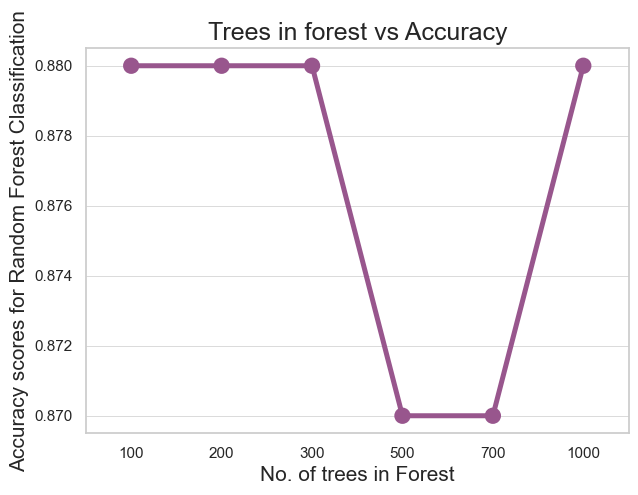

In [47]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})

plt.figure(figsize=(7, 5))
sns.pointplot(
    x = 'No. of trees in Forest',
    y = 'Accuracy scores for Random Forest Classification',
    data = tree_vs_acc,color ='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()
# plt.savefig('Trees in forest vs Accuracy.png', bbox_inches='tight', dpi = None)

## **5.Deploy model machine learning**
pada langlah terakhir ini mengcovert model yang sudah kita buat menjadi format pickle agar kita dapat melakukan deploy melalui API machine learning

### **5.1 Build model machine learning dalam bentuk API dengan library joblib**
deploy model dalam bentuk API 

In [48]:
import joblib 

# joblib.dump((ensemble), 'API-BMI-Ensemble-Learning.pkl')
ensemble = joblib.load("../Model development/API-BMI-Ensemble-Learning.pkl")
print('Loaded model score:', ensemble.score(X_test, Y_test))

Loaded model score: 0.8


In [49]:
import joblib

# joblib.dump((rfc), 'API-BMI-Model-Using-Random-Forest.pkl')
rfc = joblib.load('../Model development/API-BMI-Model-Using-Random-Forest.pkl')
print('Loaded model score:', rfc.score(x_test, y_test))

Loaded model score: 0.88


hasil akurasi API sesuai dengan model yang kita buat taitu mencapai 90 %

### **5.2 Tes Model API dengan data baru**
kita juga dapat melakukan testing dengan memberikan data baru kemudian menggunakan model API yang kita buat untuk menguji hasil klasifikasi

In [50]:
# data baru, jenis kelamin male, tinggi badan = 165 cm, berat badan = 56 cm
test = [[1,165, 56]]
ensemble.predict(test)

array([2], dtype=int64)

#### **Simple Deployment IF-Else Decision Tree**

In [51]:
def health_test(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    individual_data_dict = {'Gender':gender, 'Height':height, 'Weight':weight}   
    individual_data = pd.DataFrame(data = individual_data_dict, index=[0])
    individual_data.iloc[:,0] = lbl_enc.transform(individual_data.iloc[:,0])
    df = pd.DataFrame(individual_data)
    y_pred = rfc.predict(individual_data)
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'

In [52]:
dataBmi.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


#### **Test Predict Model**

In [53]:
sample_person = ['Male',165,65]
sample_result = health_test(*sample_person)
print("status kesehatan anda bedasarkan berat badan : ",sample_result)

status kesehatan anda bedasarkan berat badan :  Normal


In [54]:
sample_person = ['Female',175,96]
sample_result = health_test(*sample_person)
print("status kesehatan anda bedasarkan berat badan : ",sample_result)

status kesehatan anda bedasarkan berat badan :  Obesity


In [55]:
sample_person = ['Female',195,104]
sample_result = health_test(*sample_person)
print("status kesehatan anda bedasarkan berat badan : ",sample_result)

status kesehatan anda bedasarkan berat badan :  Overweight


### **Deploy Machine Learning using web app**

In [81]:
import gradio as gr 

def make_prediction(Gender, Height, Weight):  
    rfc  = joblib.load('../Model development/API-BMI-Model-Using-Random-Forest.pkl')
    y_pred = rfc.predict([[Gender, Height, Weight]])
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'

# Create the input component for Gradio since we are expecting 3 inputs
Gender_input = gr.Textbox(label = "Enter Gender Status {0:Female, 1:Male}")
Height_input = gr.Number(label  = "Enter Height")
Weight_input = gr.Number(label  = "Enter Weight")

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, 
                   title="Prediksi Health status berbasis model Machine Learning",  description="Here's a sample Artificial Intellegence. Enjoy!",
                   inputs=[Gender_input, Height_input, Weight_input], outputs=output)
app.launch()

Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.
